In [ ]:
pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.DataFrame(pd.read_csv("SleepStudyData.csv"))
df

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes
...,...,...,...,...,...,...
99,No,7.0,Yes,Yes,2,Yes
100,No,7.0,No,Yes,3,Yes
101,Yes,8.0,Yes,Yes,3,Yes
102,Yes,7.0,Yes,Yes,2,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      104 non-null    object 
 1   Hours       102 non-null    float64
 2   PhoneReach  104 non-null    object 
 3   PhoneTime   104 non-null    object 
 4   Tired       104 non-null    int64  
 5   Breakfast   104 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.0+ KB


In [ ]:
df.isnull().sum()

Enough        0
Hours         2
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64

In [ ]:
mean_hours=df['Hours'].mean()

df['Hours'].fillna(value=mean_hours, inplace=True)

In [ ]:
df.isnull().sum()

Enough        0
Hours         0
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 4 categorical variables

The categorical variables are :

 ['Enough', 'PhoneReach', 'PhoneTime', 'Breakfast']


In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 2 numerical variables

The numerical variables are : ['Hours', 'Tired']


In [ ]:
df_categorical = df[['Enough', 'PhoneReach', 'PhoneTime', 'Breakfast']]                                  # Extract certain columns
print(df_categorical)

    Enough PhoneReach PhoneTime Breakfast
0      Yes        Yes       Yes       Yes
1       No        Yes       Yes        No
2      Yes        Yes       Yes       Yes
3       No        Yes       Yes        No
4       No        Yes       Yes       Yes
..     ...        ...       ...       ...
99      No        Yes       Yes       Yes
100     No         No       Yes       Yes
101    Yes        Yes       Yes       Yes
102    Yes        Yes       Yes       Yes
103    Yes        Yes       Yes       Yes

[104 rows x 4 columns]


In [ ]:
df_numeric = df[['Hours', 'Tired']]                                  # Extract certain columns
print(df_numeric)

     Hours  Tired
0      8.0      3
1      6.0      3
2      6.0      2
3      7.0      4
4      7.0      2
..     ...    ...
99     7.0      2
100    7.0      3
101    8.0      3
102    7.0      2
103    6.0      3

[104 rows x 2 columns]


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical

,Enough,PhoneReach,PhoneTime,Breakfast
0,1,1,1,1
1,0,1,1,0
2,1,1,1,1
3,0,1,1,0
4,0,1,1,1
...,...,...,...,...
99,0,1,1,1
100,0,0,1,1
101,1,1,1,1
102,1,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_numeric = scaler.fit_transform(df_numeric)

df_numeric = pd.DataFrame(df_numeric, columns=['Hours', 'Tired'])
df_numeric

,Hours,Tired
0,0.961390,-0.076416
1,-0.470169,-0.076416
2,-0.470169,-1.069825
3,0.245611,0.916993
4,0.245611,-1.069825
...,...,...
99,0.245611,-1.069825
100,0.245611,-0.076416
101,0.961390,-0.076416
102,0.245611,-1.069825


In [ ]:
df_final = pd.concat([df_numeric, df_categorical], axis=1, join='inner')
display(df_final)

,Hours,Tired,Enough,PhoneReach,PhoneTime,Breakfast
0,0.961390,-0.076416,1,1,1,1
1,-0.470169,-0.076416,0,1,1,0
2,-0.470169,-1.069825,1,1,1,1
3,0.245611,0.916993,0,1,1,0
4,0.245611,-1.069825,0,1,1,1
...,...,...,...,...,...,...
99,0.245611,-1.069825,0,1,1,1
100,0.245611,-0.076416,0,0,1,1
101,0.961390,-0.076416,1,1,1,1
102,0.245611,-1.069825,1,1,1,1


Silhouette Score

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

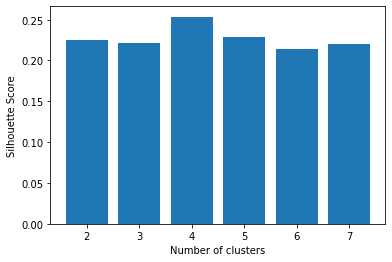

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(df_final, KMeans(n_clusters = n_cluster).fit_predict(df_final)))

k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df_final)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,-0.925782,0.605597
1,0.436803,-0.388893


Silhouette Score (After PCA)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

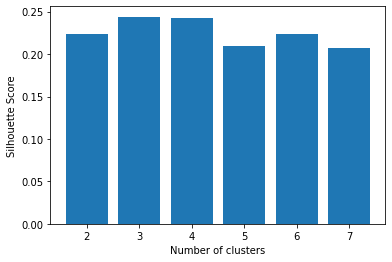

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(df_final, KMeans(n_clusters = n_cluster).fit_predict(X_principal)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

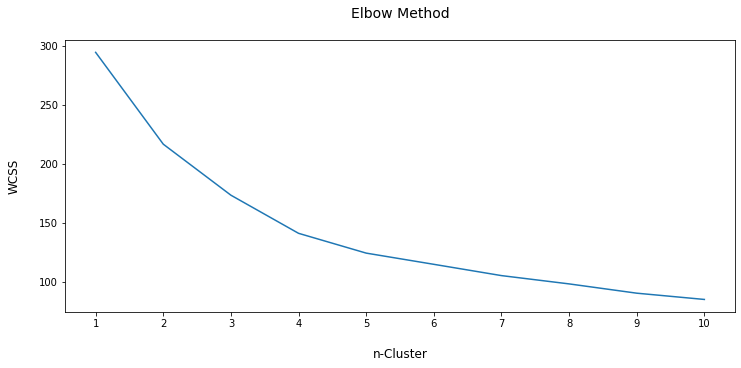

In [ ]:
def elbowMethod(X, k_min=1, k_max=10, save=False):
    K_range = range(k_min,k_max+1)

    result = []
    for k in K_range:
        model = KMeans(n_clusters = k, random_state=20)
        model.fit(X)
        result.append(model.inertia_)

    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(K_range, result, marker='')

    sns.set_style("white")
    plt.xticks(K_range)
    plt.title('Elbow Method\n', fontsize=14)
    plt.xlabel('\nn-Cluster', fontsize=12)
    plt.ylabel('WCSS\n', fontsize=12)

    if save==True:
        plt.savefig('elbowMethod.png', dpi=200)

    plt.show()

elbowMethod(df_final)

In [ ]:
k2 = KMeans(n_clusters=4, random_state=9)
k2.fit(X_principal)

k_df_final=pd.DataFrame(df_final)
k_df_final['cluster_lifehabit'] = k2.labels_
k_df_final

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Hours,Tired,Enough,PhoneReach,PhoneTime,Breakfast,cluster_lifehabit
0,0.961390,-0.076416,1,1,1,1,0
1,-0.470169,-0.076416,0,1,1,0,1
2,-0.470169,-1.069825,1,1,1,1,1
3,0.245611,0.916993,0,1,1,0,2
4,0.245611,-1.069825,0,1,1,1,0
...,...,...,...,...,...,...,...
99,0.245611,-1.069825,0,1,1,1,0
100,0.245611,-0.076416,0,0,1,1,1
101,0.961390,-0.076416,1,1,1,1,0
102,0.245611,-1.069825,1,1,1,1,0


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


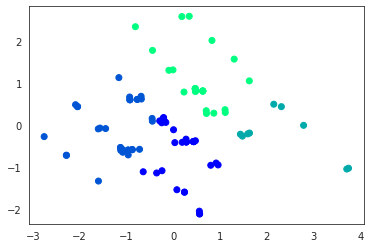

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = KMeans(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter)
plt.show()

In [ ]:
X_principal

,P1,P2
0,-0.925782,0.605597
1,0.436803,-0.388893
2,-0.641273,-1.106422
3,0.632607,0.813529
4,-0.876763,-0.579849
...,...,...
99,-0.876763,-0.579849
100,-0.205884,0.178600
101,-0.925782,0.605597
102,-1.121587,-0.596825


In [ ]:
df['cluster_lifehabit'] = k2.labels_
df

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast,cluster_lifehabit
0,Yes,8.0,Yes,Yes,3,Yes,0
1,No,6.0,Yes,Yes,3,No,1
2,Yes,6.0,Yes,Yes,2,Yes,1
3,No,7.0,Yes,Yes,4,No,2
4,No,7.0,Yes,Yes,2,Yes,0
...,...,...,...,...,...,...,...
99,No,7.0,Yes,Yes,2,Yes,0
100,No,7.0,No,Yes,3,Yes,1
101,Yes,8.0,Yes,Yes,3,Yes,0
102,Yes,7.0,Yes,Yes,2,Yes,0


In [ ]:
df.cluster_lifehabit = df.cluster_lifehabit.astype(str)

df

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast,cluster_lifehabit
0,Yes,8.0,Yes,Yes,3,Yes,0
1,No,6.0,Yes,Yes,3,No,1
2,Yes,6.0,Yes,Yes,2,Yes,1
3,No,7.0,Yes,Yes,4,No,2
4,No,7.0,Yes,Yes,2,Yes,0
...,...,...,...,...,...,...,...
99,No,7.0,Yes,Yes,2,Yes,0
100,No,7.0,No,Yes,3,Yes,1
101,Yes,8.0,Yes,Yes,3,Yes,0
102,Yes,7.0,Yes,Yes,2,Yes,0


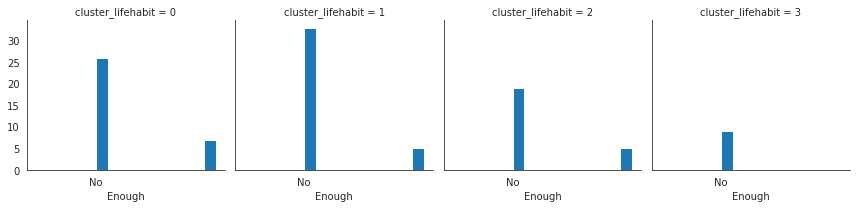

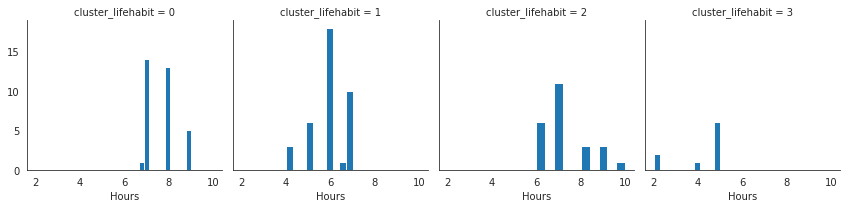

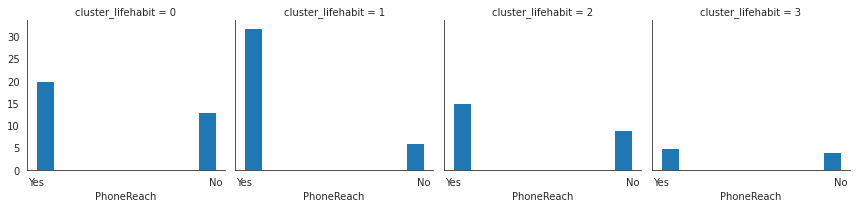

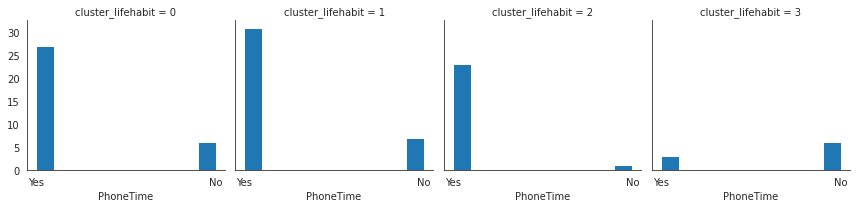

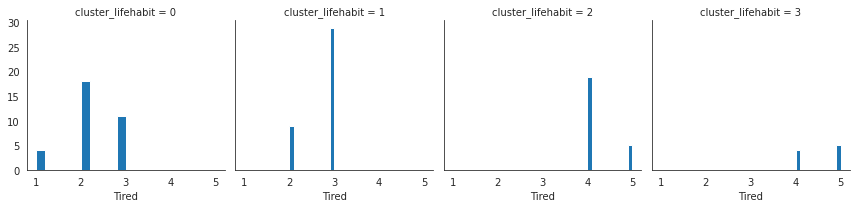

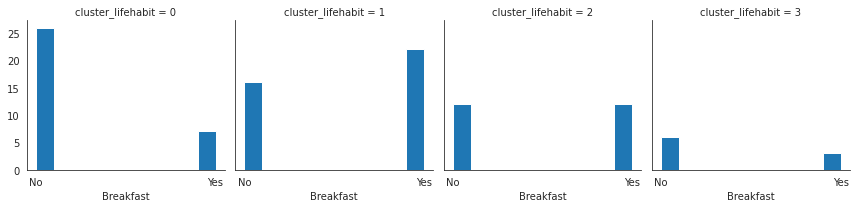

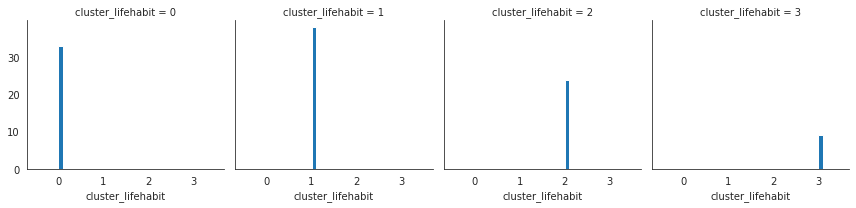

In [ ]:
for c in df:
    grid= sns.FacetGrid(df, col='cluster_lifehabit')
    grid.map(plt.hist, c)